# TP 1 RL : Dynamic programing

L'objectif de ce TP est de se familiariser avec la programmation dynamique pour le calcul de fonction de valeur d'état et de politique. Nous nous commencerons avec un environnement très simple : un griddworld de taille $10\times 10$. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from time import sleep
from IPython.display import clear_output
import math
import numpy.matlib
import imageio

In [1]:
#@title Utils functions 

def plot_pi(pi):
  plt.xticks(np.arange(-1, N+1, 1))
  plt.yticks(np.arange(-1, N+1, 1))
  plt.grid( which='major')

  param = {'lw':3,
           'head_width':2/N}
  for i in range(pi.shape[0]):
    ll = pi[i,:]
    x = i%N
    y = N - math.ceil((i+1)/N)
    args = np.argwhere(ll>0)
    for n in args:
      if n==0:
        plt.arrow(x,y,.5,0,**param)
      elif n==1:
        plt.arrow(x,y,0,.5,**param)
      elif n==2:
        plt.arrow(x,y,-.5,0,**param)
      elif n==3:
        plt.arrow(x,y,0,-.5,**param)

def get_next_Vij(V_2d,i,j):
  if i<0 or i>N or j<0 or j>N: 
    raise ValueError("indices must be between 0 and N")
  if i==0:
    if j==N-1:
      ll = (-1e3,-1e3,V_2d[i,j-1],V_2d[i+1,j])
    else:
      ll = (V_2d[i,j+1],-1e3,V_2d[i,j-1],V_2d[i+1,j])
  elif j==0:
    if i==N-1:
      ll = (V_2d[i,j+1],V_2d[i-1,j],-1e3,-1e3)
    else:
      ll = (V_2d[i,j+1],V_2d[i-1,j],-1e3,V_2d[i+1,j])
  elif i==N-1:
    ll = (V_2d[i,j+1],V_2d[i-1,j],V_2d[i,j-1],-1e3)
  elif j==N-1:
    ll = (-1e3,V_2d[i-1,j],V_2d[i,j-1],V_2d[i+1,j])
  else:
    ll = (V_2d[i,j+1],V_2d[i-1,j],V_2d[i,j-1],V_2d[i+1,j])
  return ll


def get_Ppi(pi):

  P = np.zeros([N**2,N**2])
  p = 1
  pi = np.array(pi)
  if pi.size == 4:
    pi = np.matlib.repmat(pi,N**2,1)
  
  for i in range(N):
    for j in range(N):
      s   = i*N+j
      s_E = i*N+j+1
      s_N = (i-1)*N+j
      s_O = i*N+j-1
      s_S = (i+1)*N+j

      if j < N-1:
        P[s,s_E] = p*pi[i*N+j,0]
      else :
        P[s,s] = p*pi[i*N+j,0]
      if i > 0:
        P[s,s_N] = p*pi[i*N+j,1]
      else :
        P[s,s] = p*pi[i*N+j,1]
      if j > 0:
        P[s,s_O] = p*pi[i*N+j,2]
      else :
        P[s,s] = p*pi[i*N+j,2]
      if i < N-1:
        P[s,s_S] = p*pi[i*N+j,3]
      else :
        P[s,s] = p*pi[i*N+j,3]
      if (i,j)==(0,N-1):
        P[s,s] = p*pi[i*N+j,0] + p*pi[i*N+j,1]
      if (i,j)==(N-1,0):
        P[s,s] = p*pi[i*N+j,2] + p*pi[i*N+j,3]

  P[0,:] = 0
  P[N**2-1,:]=0

  return P


## Partie 1 : Initialisation

Pour commencer nous allons définir la dynamique du modèle et en particulier la matrice de transition $\mathcal P$ du griddworld ainsi que la matrice de récompense $\mathcal R^\pi \in \mathbb R^{N,N}$ pour une politique de mouvement uniforme avec une probabilité $\pi = 0.25$ constante et récompense constante poour chaque état $r = -1$ sauf pour les états terminaux $(0,0)$ et $(N,N)$ où $r=0$. 

In [ ]:
N = 10
R = -1*np.ones([N**2,1])
R[0] = 0
R[N**2-1] = 0

Création de la matrice de transition pour une politique de mouvements uniforme avec une probailité $\pi$ = 0.25 et une transition déterministe $p(s' | s, a) = 1$ pour $s'$ situé en $E,N,O$ ou $S$ par rapport à $s$.

**coding task**

Complétez l'mplémentation de la matrice $\mathcal P$ associé à un choix aléatoire parmis les 4 directions $E,N,O$ ou $S$. **Attention** on part du principe que l'agent ne passe pas à travers les bords et une tentative de sorti du griddworld ramène dans le même état (d'où les `if` `else` imbriqués).

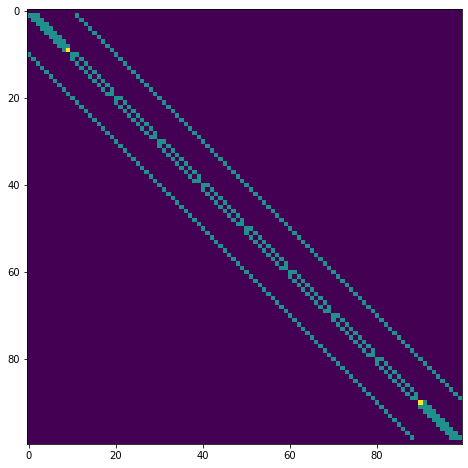

In [ ]:
P = np.zeros([N**2,N**2])
p = 1
pi = .25

for i in range(N):
  for j in range(N):
    s   = i*N+j
    s_E = i*N+j+1
    s_N = (i-1)*N+j
    s_O = i*N+j-1
    s_S = (i+1)*N+j

    if j < N-1:
      P[s,s_E] = # à compléter avec la bonne probabilité
    else :
      P[s,s] = # à compléter avec la bonne probabilité
    if i > 0:
      P[s,s_N] = # à compléter avec la bonne probabilité
    else :
      P[s,s] = # à compléter avec la bonne probabilité
    if j > 0:
      P[s,s_O] = # à compléter avec la bonne probabilité
    else :
      P[s,s] = # à compléter avec la bonne probabilité
    if i < N-1:
      P[s,s_S] = # à compléter avec la bonne probabilité
    else :
      P[s,s] = # à compléter avec la bonne probabilité
    if (i,j)==(0,N-1) or (i,j)==(N-1,0):
      P[s,s] = # à compléter avec la bonne probabilité

P[0,:] = 0
P[N**2-1,:]=0

#plt.imshow(P)

## Partie 2 : Estimation de la politique et de la valeur des états associée

**Coding Task**: Compléter la fonction suivante permettant d'obtenir la fonction de valeur d'état en implémentant la récursion de Bellman.

In [ ]:
def get_V(iter,P,R,gamma,show=1):
  V = np.zeros([N**2,1])
  for n in range(iter):

    V = # Votre code ici
    
    if show and n % 100 == 99:
      clear_output()
      plt.imshow(np.reshape(V,[N,N]))
      plt.title(f'Iteration = {n+1}')
      plt.show()
      sleep(1)
  return V

Maintenant que nous avons toutes nos fonctions, nous pouvons calculer la fonction de valeur d'état en itérant sur notre politique $\pi$ :

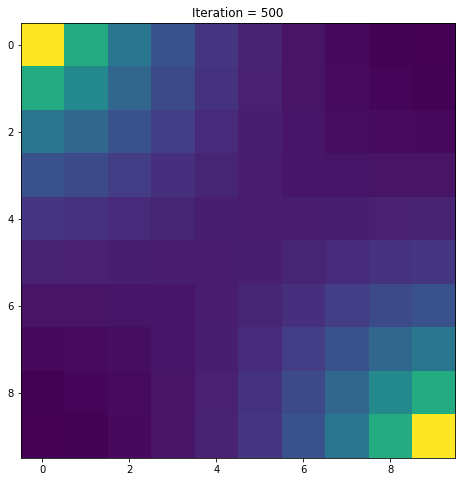

In [ ]:
V = np.zeros([N**2,1])
gamma = 1
n_iter = 500

fig = plt.figure()

V = get_V(n_iter,P,R,gamma)
  

Sans surprise, plus on est proche des points à atteindre, plus la valeur des états est élevée.

**Amélioration de la politique par action gloutonne** : l'évaluation de la fonction de coût associée à notre politique naive nous permet de mettre en évidence une politique $\pi' \geq \pi$. Pour cela il nous faut calculer en tout point quel est le meilleur coup à jouer, c'est à dire la poltique gloutonne ou $greedy$. 

**coding task**: Compléter la fonction suivante pour obtenir la greedy policy à partir de la fonction de valeur d'état. La fonction get_next_Vij() renvoie la valeur des états voisins dans un tableau de taille le nombre d'action (donc 4 dans notre cas) avec l'espérance de la valeur d'état après avoir choisi l'action correspondant à l'indice du tableau.

In [ ]:
def greedy_policy(V):
  V_2d = np.reshape(V,[N,N])
  pi = np.zeros([N**2,4])

  for i in range(N):
    for j in range(N):
      if i==0 and j==0 or i==N-1 and j==N-1:
          continue
      V_voisin = get_next_Vij(V_2d,i,j)
      
      # Votre code ici
      pi[i*N+j,args] = ...
  
  return pi

Nous pouvons enfin afficher la valeur de la politique pour ce griddworld

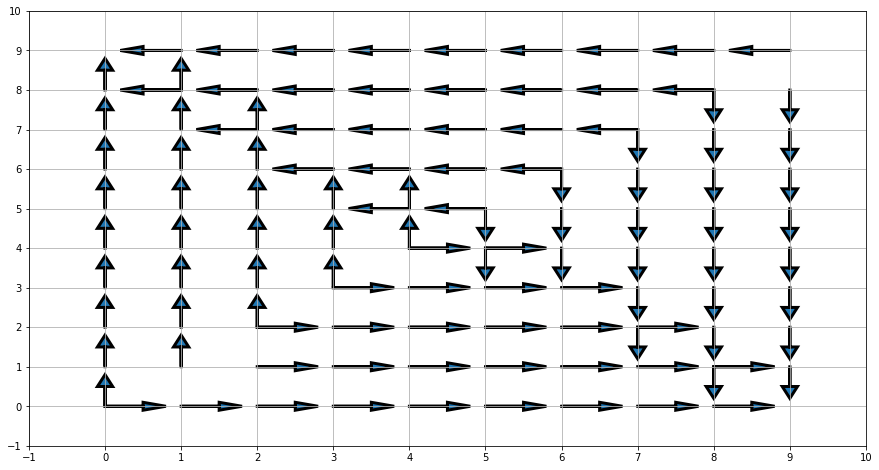

In [ ]:
pi = greedy_policy(V)
plot_pi(pi)

## Partie 3 : Maximisation de la politique

Dans le cas précédent, tout l'espace était exploré, conduisant à découvrir la politique optimale après une seule itération. A présent, nous allons initialiser notre politique en faisant le choix d'aller toujours à l'est puis améliorer la politique de façon gloutonne une fois la fonction de valeur estimée.

**coding task** : compléter le code suivant pour permettre d'alterner entre calcul de la fonction de valeur d'état et optimisation de la politique de façon à converger vers la politique idéale.

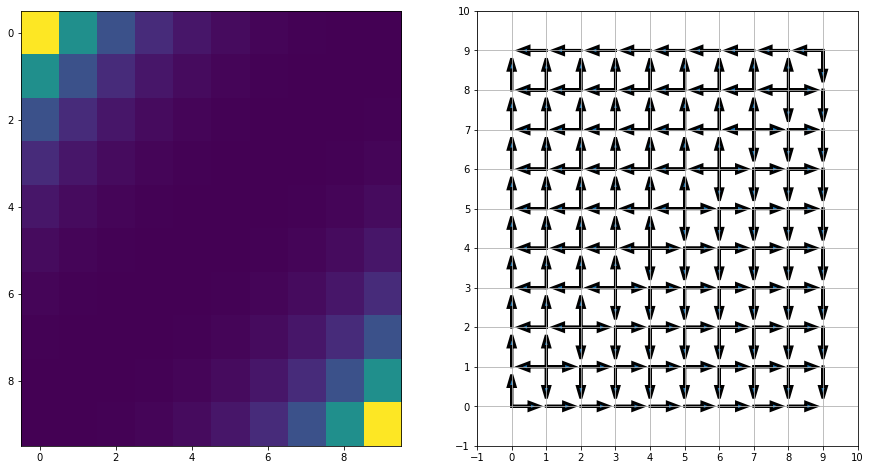

In [ ]:
iter_total = 10
iter_policy = 100
show = 1
show_every = 1
gamma = .5

plt.rcParams['figure.figsize'] = [15, 8]

P_pi = get_Ppi([1,0,0,0])
fig, axs = plt.subplots(12)

for i in range(iter_total):
  # Votre code ici
  V = ...
  pi = ...
  P_pi = ...
  if show and i % show_every == 0:
    clear_output()
    
    ax = plt.subplot(121)
    plt.imshow(np.reshape(V,[N,N]), aspect="auto")
    ax.set_title('Value Function')
    ax = plt.subplot(122)
    plot_pi(pi)
    ax.set_title('Next policy')
    plt.show()
    plt.title(i)
    sleep(4) #Utiliser une valeur plus basse si trop lent

## Partie 4 : Labyrinthe

A présent évaluons la valeur des différents états ainsi que la politique optimale pour un labyrinthe. Le labyrinthe est donné par la matrice suivante : 

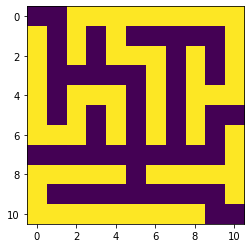

In [ ]:
maze =   np.array([[0,0,1,1,1,1,1,1,1,1,1],
                  [1,0,1,0,1,0,0,0,0,0,1],
                  [1,0,1,0,1,1,1,0,1,0,1],
                  [1,0,0,0,0,0,1,0,1,0,1],
                  [1,0,1,1,1,0,1,0,1,1,1],
                  [1,0,1,0,1,0,1,0,1,0,0],
                  [1,1,1,0,1,0,1,0,1,0,1],
                  [0,0,0,0,0,0,0,0,0,0,1],
                  [1,1,1,1,1,0,1,1,1,1,1],
                  [1,0,0,0,0,0,0,0,0,0,1],
                  [1,1,1,1,1,1,1,1,1,0,0]])

plt.imshow(maze)

**À vous de jouer !**

À vous de réécrire les matrices de transition et de récompense pour ce nouveau problème. 